http://stackoverflow.com/questions/36245039/how-can-i-plot-a-spectrogram-of-a-signal-by-computing-the-power-spectrum-on-binn

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


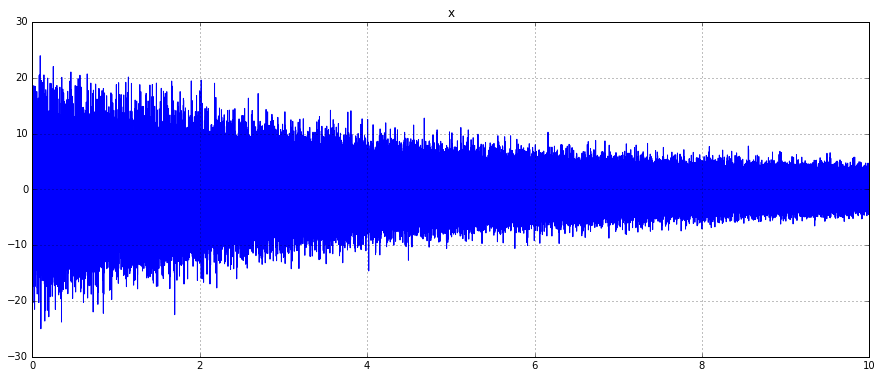

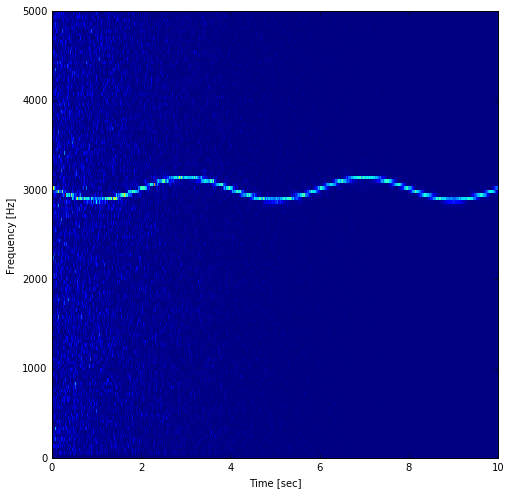

23.9572723997
-24.9734142704


In [66]:
%pylab inline --no-import-all
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
t = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*t)
carrier = amp * np.sin(2*np.pi*3e3*t + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=t.shape)
noise *= np.exp(-t/5)
x = carrier + noise

plt.figure(figsize=(15,6))
plt.plot(t,x)
plt.title('x')
plt.grid()
plt.show()


f, t, Sxx = signal.spectrogram(x, fs)
plt.figure(figsize=(8,8))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

print max(x)
print min(x)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


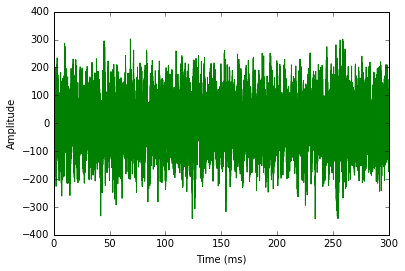

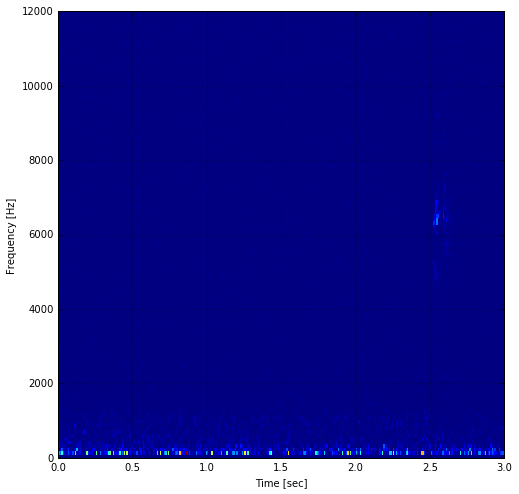

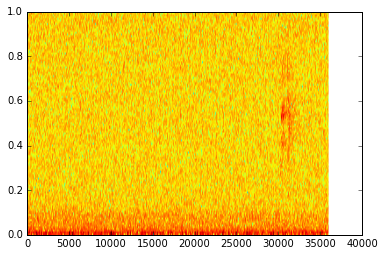

In [20]:
%pylab inline --no-import-all
from scikits.audiolab import wavread
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
import math
import numpy as np
from numpy.fft import fft
import pylab
#5h309
filename = filename ="/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/Becasse/3h1.wav"
#"/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/NonBecasse/a855.wav"

# get audio freq [ usually 44100 Hz ] and audio data
rate, data = wavfile.read(filename)

#Check if wave file is 16bit or 32 bit. 24bit is not supported
DataType = data.dtype

#convert sound (data array) to floating point values ranging from -1 to 1 as follows
#data = data / (2.**15)

#Check sample points and sound channel for duel channel(5060, 2) or  (5060, ) for mono channel
dataShape = data.shape
data_n = float(data.shape[0])  # count point of data
#If two channels, then select only one channel
dataOneChannel = data[:,0]

#Get duration of sound file
Duration =  1.0*dataOneChannel / data_n
# time array
timeArray = numpy.arange(0, data_n, 1) # create range with param (stat=0, stop=data_n, step=1)
timeArray = timeArray / rate # normalize
#Scale to milliSeconds
timeArray = timeArray * 100

#Plot the tone
plt.plot(timeArray, dataOneChannel, color='G')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()


# frequence 
'''Compute a spectrogram with consecutive Fourier transforms
Spectrograms can be used as a way of visualizing the change of a nonstationary signal’s frequency content over time.
f : Array of sample frequencies
t : Array of segment times
Sxx : Spectrogram of x. By default, the last axis of Sxx corresponds to the segment times
''' 
f, t, Sxx = signal.spectrogram(dataOneChannel,rate)
plt.figure(figsize=(8,8))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar
#plt.axis([0,0.01,t.min(),t.max()])
plt.grid()
plt.show()


'''
Compute and plot a spectrogram of data in x. Data are split into NFFT length segments and the spectrum of each section is computed. The windowing function window is applied to each segment, and the amount of overlap of each segment is specified with noverlap. The spectrogram is plotted as a colormap (using imshow).
output:
spectrum : 2-D array => Columns are the periodograms of successive segments.
freqs : 1-D array => The frequencies corresponding to the rows in spectrum.
t : 1-D array => The times corresponding to midpoints of segments (i.e., the columns in spectrum).
im : The image created by imshow containing the spectrogram
'''
spectrum,freqs,t_spec,im=pylab.specgram(dataOneChannel)
pylab.show()

In [11]:
print " ========= load data information : ========="
print "frequence rate : " ,rate
print "data.shape : ", data.shape
print "data_n : ", data_n
print "data.min() : %s  / data.max() : %s"% (data.min(),data.max())


print " ========= amplitude : ========="
print "Duration (min : %s  / max : %s) : "% (timeArray.min(),timeArray.max())
print "dataOneChannel.min() : %s  / dataOneChannel.max() : %s"% (dataOneChannel.min(),dataOneChannel.max())
print "dataOneChannel.shape : ", dataOneChannel.shape

print " ========= frequence : ========="
print "t.shape : %s   / f.shape : %s"% (t.shape,f.shape)
print "f.min() : %s  / f.max() : %s"% (f.min(),f.max())
print "t.min() : %s  / t.max() : %s"% (t.min(),t.max())
print Sxx.shape

print " ========= frequence : ========="
print "duraion: t_spec.shape : ", t.shape
print "freqs.shape : ", f.shape
print "spectrum.shape : ", Sxx.shape

print "freqs.min() : %s  / freqs.max() : %s"% (freqs.min(),freqs.max())
print "t_spec.min() : %s  / t_spec.max() : %s"% (t_spec.min(),t_spec.max())


 ========= load data information : =========
frequence rate :  24000
data.shape :  (72000, 2)
data_n :  72000.0
data.min() : -362  / data.max() : 317
 ========= amplitude : =========
Duration (min : 0.0  / max : 299.995833333) : 
dataOneChannel.min() : -343  / dataOneChannel.max() : 302
dataOneChannel.shape :  (72000,)
 ========= frequence : =========
t.shape : (321,)   / f.shape : (129,)
f.min() : 0.0  / f.max() : 12000.0
t.min() : 0.00533333333333  / t.max() : 2.992
(129, 321)
 ========= frequence : =========
duraion: t_spec.shape :  (321,)
freqs.shape :  (129,)
spectrum.shape :  (129, 321)
freqs.min() : 0.0  / freqs.max() : 1.0
t_spec.min() : 6000.0  / t_spec.max() : 29872.0


In [18]:
print Sxx.shape

(129, 321)


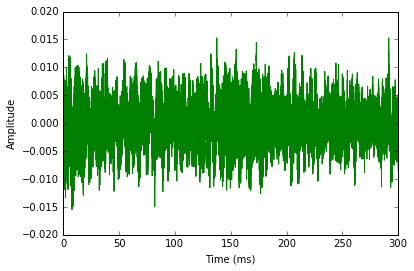

/Users/kimtaing/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:66: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


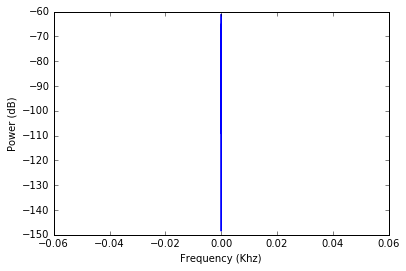

'freqArrayLength = len(freqArray)\nprint "freqArrayLength =", freqArrayLength\nnumpy.savetxt("freqData.txt", freqArray, fmt=\'%6.2f\')\n\n#Print FFtarray information\nprint "fftArray length =", len(fftArray)\nnumpy.savetxt("fftData.txt", fftArray)\n'

In [19]:
"""Plots
Time in MS Vs Amplitude in DB of a input wav signal
"""

import numpy
import matplotlib.pyplot as plt
import pylab
from scipy.io import wavfile
from scipy.fftpack import fft


myAudio = "/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/Becasse/3h3.wav"


#Read file and get sampling freq [ usually 44100 Hz ]  and sound object
samplingFreq, mySound = wavfile.read(myAudio)

#Check if wave file is 16bit or 32 bit. 24bit is not supported
mySoundDataType = mySound.dtype

#We can convert our sound array to floating point values ranging from -1 to 1 as follows

mySound = mySound / (2.**15)

#Check sample points and sound channel for duel channel(5060, 2) or  (5060, ) for mono channel

mySoundShape = mySound.shape
samplePoints = float(mySound.shape[0])

#Get duration of sound file
signalDuration =  mySound.shape[0] / samplingFreq

#If two channels, then select only one channel
mySoundOneChannel = mySound[:,0]

#Plotting the tone

# We can represent sound by plotting the pressure values against time axis.
#Create an array of sample point in one dimension
timeArray = numpy.arange(0, samplePoints, 1)

#
timeArray = timeArray / samplingFreq

#Scale to milliSeconds
timeArray = timeArray * 100

#Plot the tone
plt.plot(timeArray, mySoundOneChannel, color='G')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()


#Plot frequency content
#We can get frquency from amplitude and time using FFT , Fast Fourier Transform algorithm

#Get length of mySound object array
mySoundLength = len(mySound)

#Take the Fourier transformation on given sample point 
#fftArray = fft(mySound)
fftArray = fft(mySoundOneChannel)

numUniquePoints = numpy.ceil((mySoundLength + 1) / 2.0)
fftArray = fftArray[0:numUniquePoints]

#FFT contains both magnitude and phase and given in complex numbers in real + imaginary parts (a + ib) format.
#By taking absolute value , we get only real part

fftArray = abs(fftArray)

#Scale the fft array by length of sample points so that magnitude does not depend on
#the length of the signal or on its sampling frequency

fftArray = fftArray / float(mySoundLength)

#FFT has both positive and negative information. Square to get positive only
fftArray = fftArray **2

#Multiply by two (research why?)
#Odd NFFT excludes Nyquist point
if mySoundLength % 2 > 0: #we've got odd number of points in fft
    fftArray[1:len(fftArray)] = fftArray[1:len(fftArray)] * 2

else: #We've got even number of points in fft
    fftArray[1:len(fftArray) -1] = fftArray[1:len(fftArray) -1] * 2  

freqArray = numpy.arange(0, numUniquePoints, 1.0) * (samplingFreq / mySoundLength);

#Plot the frequency
plt.plot(freqArray/1000, 10 * numpy.log10 (fftArray), color='B')
plt.xlabel('Frequency (Khz)')
plt.ylabel('Power (dB)')
plt.show()

#Get List of element in frequency array
#print freqArray.dtype.type
'''freqArrayLength = len(freqArray)
print "freqArrayLength =", freqArrayLength
numpy.savetxt("freqData.txt", freqArray, fmt='%6.2f')

#Print FFtarray information
print "fftArray length =", len(fftArray)
numpy.savetxt("fftData.txt", fftArray)
'''

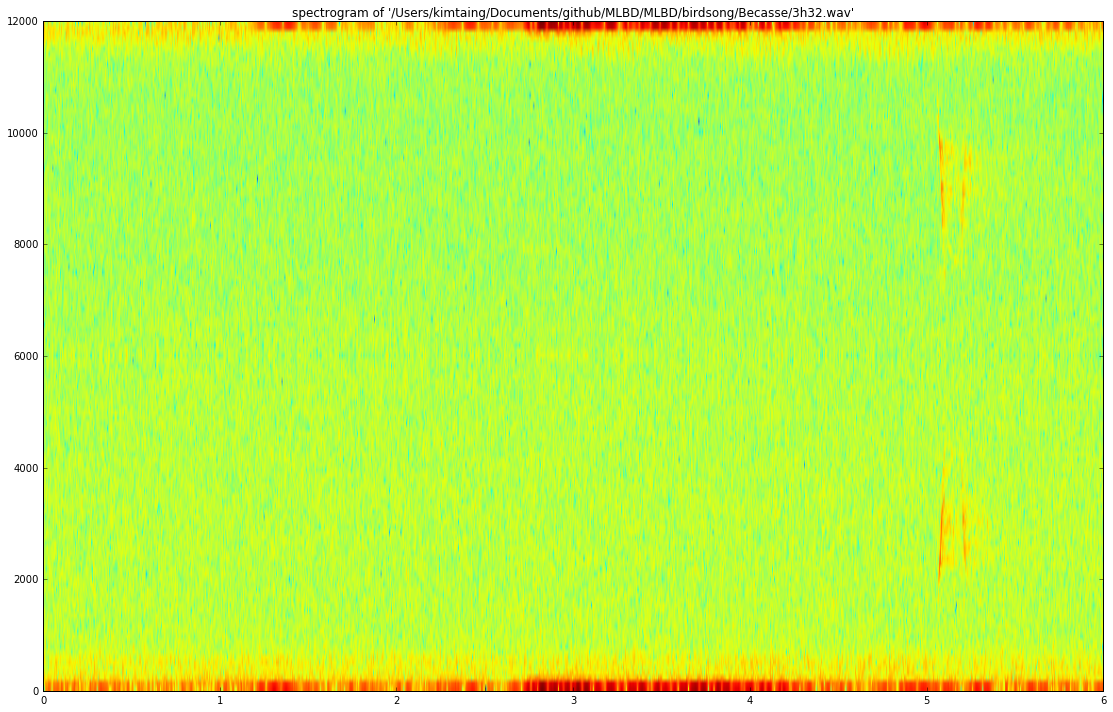

In [70]:
import os
import wave

import pylab

def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'Int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    return pylab.specgram(sound_info, Fs=frame_rate)
    #pylab.savefig('spectrogram.png')
    #"/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/Becasse/3h20.wav"
t=graph_spectrogram("/Users/kimtaing/Documents/github/MLBD/MLBD/birdsong/Becasse/3h32.wav")